In [21]:
import numpy as np 
import torch 
import matplotlib.pyplot as plt 

In [22]:
def forward(X, W, b):
    return W*X + b

In [23]:
def mse(Yhat, Y, m):
    return (1/(2*m))*torch.sum((Yhat - Y)**2)

In [24]:
def update(W, b, W_grad, b_grad, alpha):
    W = W -alpha*W_grad
    b = b - alpha*b_grad
    return W, b

In [25]:
m = 100
noise_qty = 0.1
alpha = 0.0001
num_iters = 100000

In [26]:

X = torch.rand(m)*m
W_optim = torch.rand(1)
b_optim = torch.rand(1)
Y = forward(X, W_optim, b_optim) + torch.rand(m)*(m*noise_qty)

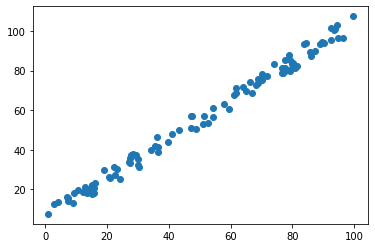

In [27]:
plt.scatter(X, Y)
plt.show()

In [28]:
W = torch.rand(1, requires_grad=True)
b = torch.rand(1, requires_grad=True)


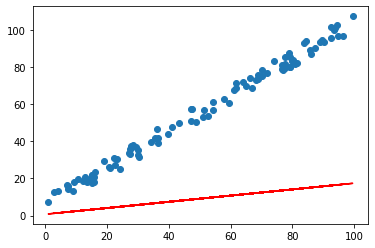

In [29]:
Yhat = forward(X, W, b).detach()
plt.scatter(X, Y)
plt.plot(X, Yhat, color = "red")
plt.show()

In [30]:

costs = []
for i in range(num_iters):
    if(i % (num_iters//100) == 0):
        print("\r",i/(num_iters//100), "%", end = "")
    W = W.clone().detach().requires_grad_(True)
    b = b.clone().detach().requires_grad_(True)
    Yhat = forward(X, W, b)
    cost = mse(Yhat, Y, m)
    cost.backward()
    costs.append(cost.item())
    W, b = update(W, b ,W.grad, b.grad, alpha)
print("")

99.0 %


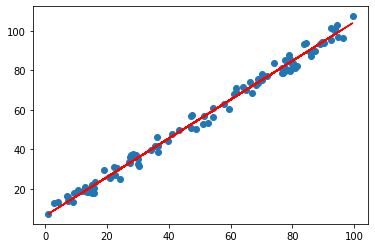

In [31]:
Yhat = forward(X, W, b).detach()
plt.scatter(X, Y)
plt.plot(X, Yhat, color = 'red')

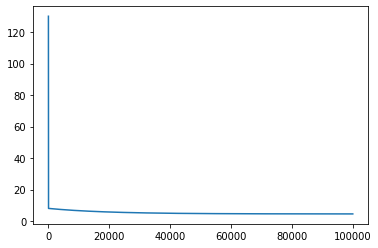

In [20]:
plt.plot(costs)
plt.show()